# Optical Recognition of Handwritten Digits

In [1]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from mlflow_for_ml_dev.src.ml_core.pipelines import get_sk_pipeline
import mlflow 
import pandas as pd 

# Exploring dataset

In [3]:
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 

# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

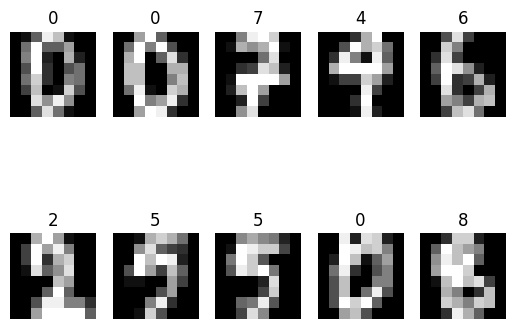

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(8,8), cmap='gray')
    plt.axis('off')
    plt.title(y["class"].iloc[i])

## First Approach using a tree based model for classification.

### Setting the experiment

In [ ]:
PROJECT_NAME= "optical-recognition-of-handwritten-digits"
tree_based_model_exp_name = "classifier-with-tree-based-model"

try: 
    experiment_id = mlflow.create_experiment(name=tree_based_model_exp_name, tags={"project":PROJECT_NAME})
    print(f"Experiment {tree_based_model_exp_name} created with ID: {experiment_id}")
except:
    experiment = mlflow.get_experiment_by_name(name=tree_based_model_exp_name)
    experiment_id = experiment.experiment_id
    print(f"Experiment {tree_based_model_exp_name} already exists with ID: {experiment_id}")

# set the experiment as active experiment
tree_based_model_exp = mlflow.set_experiment(experiment_name=tree_based_model_exp_name)

Experiment classifier-with-tree-based-model created with ID: 535970446529498362


In [10]:
pipeline = get_sk_pipeline(numerical_columns=X.columns, categorical_columns=[]) 
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribut...
       'Attribute43', 'Attribute44', 'Attribute45', 'Attribute46',
       'Attribute47', 'Attribute48', 'Attribute49', 'Attribute50',
       'Attribute51', 'Attribute52', 'Attribute53', 'Attribute54',
       'Attribute55', 'Attribute56', 'Attribute57', 'Attribute58',
       'Attribute59', 'Attribute60', 'Attribute61', 'Attribute62',
       'Attribute63', 'Attribute64'],
      dtype='object')),
                                                 ('encoder', OneHotEncoder(),
                                                  [])])),
                ('model', RandomForestClassifier())])

In [11]:
pipeline.fit(X_train, y_train)

c:\Users\manue\projects\mlflow_for_ml_dev\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribut...
       'Attribute43', 'Attribute44', 'Attribute45', 'Attribute46',
       'Attribute47', 'Attribute48', 'Attribute49', 'Attribute50',
       'Attribute51', 'Attribute52', 'Attribute53', 'Attribute54',
       'Attribute55', 'Attribute56', 'Attribute57', 'Attribute58',
       'Attribute59', 'Attribute60', 'Attribute61', 'Attribute62',
       'Attribute63', 'Attribute64'],
      dtype='object')),
                                                 ('encoder', OneHotEncoder(),
                                                  [])])),
                ('model', RandomForestClassifier())])

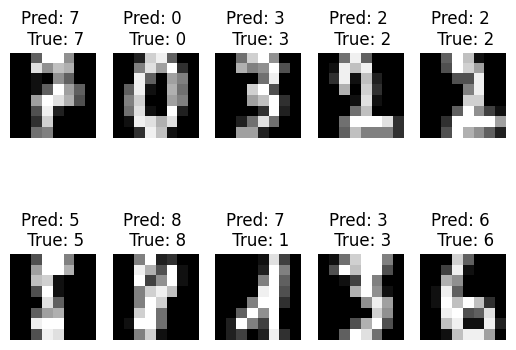

In [13]:
predictions = pipeline.predict(X_test)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(8,8), cmap='gray')
    # remove axis
    plt.axis('off')
    plt.title(f"Pred: {predictions[i]} \n True: {y_test['class'].iloc[i]}")
    tree_based_model_prediction_image = plt.gcf()

### Evaluating and saving the model

In [15]:
# create evaluation dataset
eval_data = X_test.copy()
eval_data["target"] = y_test["class"]
eval_data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64,target
4122,0,0,6,16,16,9,0,0,0,0,...,0,0,0,7,8,0,0,0,0,7
3074,0,0,2,13,15,6,0,0,0,0,...,0,0,0,3,15,12,1,0,0,0
80,0,0,7,13,16,9,0,0,0,0,...,0,0,0,10,10,2,0,0,0,3
1961,0,0,7,15,6,0,0,0,0,1,...,3,0,0,6,12,8,8,8,3,2
5441,0,0,6,16,12,1,0,0,0,0,...,10,0,0,5,16,11,9,6,2,2


In [16]:

# starting a run.
with mlflow.start_run(run_name="tree-based-model", tags={"project":PROJECT_NAME}) as run:

    # log the pipeline
    mlflow.sklearn.log_model(sk_model=pipeline, artifact_path="model", input_example=X_train.sample(5))
    
    # log figure
    mlflow.log_figure(figure=tree_based_model_prediction_image, artifact_file="predictions.png")

    # run evaluation
    tree_based_model_result = mlflow.evaluate(
        model = f"runs:/{run.info.run_id}/model",
        feature_names=X.columns,
        data = eval_data,
        targets="target",
        model_type="classifier"
    )

c:\Users\manue\projects\mlflow_for_ml_dev\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\manue\projects\mlflow_for_ml_dev\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your

c:\Users\manue\projects\mlflow_for_ml_dev\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/22 13:45:16 WARNING mlflow.models.evaluation.evaluators.classifier: According to the evaluation dataset label values, the model type looks like None, but you specified model type 'classifier'. Please verify that yo

# Second approach Using Neural Networks

### Setting the experiment

In [29]:
cvnn_based_model_exp_name = "classifier-with-cvnn-based-model"

try: 
    experiment_id = mlflow.create_experiment(name=cvnn_based_model_exp_name, tags={"project":PROJECT_NAME})
    print(f"Experiment {cvnn_based_model_exp_name} created with ID: {experiment_id}")
except:
    experiment = mlflow.get_experiment_by_name(name=cvnn_based_model_exp_name)
    experiment_id = experiment.experiment_id
    print(f"Experiment {cvnn_based_model_exp_name} already exists with ID: {experiment_id}")

# set the experiment as active experiment
cvnn_based_model_exp = mlflow.set_experiment(experiment_name=cvnn_based_model_exp_name)

Experiment classifier-with-cvnn-based-model created with ID: 979641374447411913


In [30]:
# reshape the data to be shape of (8, 8, 1)
X_train_ = X_train.values.reshape(-1, 8, 8, 1) / 16
X_test_ = X_test.values.reshape(-1, 8, 8, 1) / 16

y_train_ = y_train.values.reshape(-1)
y_test_ = y_test.values.reshape(-1)

print(X_train_.shape)
print(y_train_.shape)

print(X_test_.shape)
print(y_test_.shape)

(4496, 8, 8, 1)
(4496,)
(1124, 8, 8, 1)
(1124,)


In [31]:
import os 
os.environ["KERAS_BACKEND"] = "torch"

import keras
# Model parameters
num_classes = 10
input_shape = (8, 8, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 8)        │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 2, 2, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 8)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,338 (5.23 KB)

 Trainable params: 1,338 (5.23 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")])

In [34]:
batch_size = 64
epochs = 100
# Train the model
model.fit(
    X_train_,
    y_train_,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
)


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.1446 - loss: 2.2696 - val_acc: 0.2400 - val_loss: 2.0978
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.2483 - loss: 2.0225 - val_acc: 0.3985 - val_loss: 1.6867
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.4101 - loss: 1.6549 - val_acc: 0.6089 - val_loss: 1.2468
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5717 - loss: 1.2490 - val_acc: 0.7689 - val_loss: 0.8619
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.6970 - loss: 1.0032 - val_acc: 0.8385 - val_loss: 0.6528
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.7358 - loss: 0.8234 - val_acc: 0.8830 - val_loss: 0.5287
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.7586 - loss: 0.7626 - val_acc: 0.8904 - val_loss: 0.4706
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.7916 - loss: 0.6766 - val_acc: 0.9096 - val_loss: 0.4251
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - ac

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


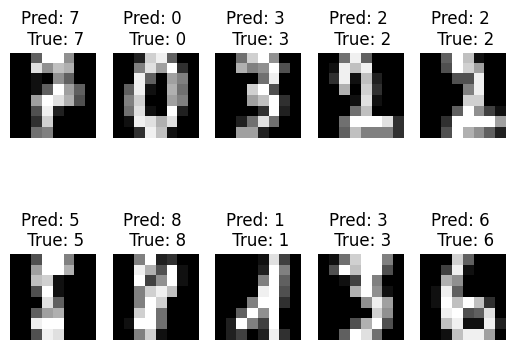

In [35]:
predictions = model.predict(X_test_)
predictions = predictions.argmax(axis=1)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(8,8), cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {predictions[i]} \n True: {y_test['class'].iloc[i]}")
    cvnn_prediction_image = plt.gcf()

In [40]:
def cvnn_model(model_input):
    model_input_ = model_input.values.reshape(-1, 8, 8, 1) / 16
    return model.predict(model_input_).argmax(axis=1)

# starting a run.
with mlflow.start_run(run_name="cvnn-based-model", tags={"project":PROJECT_NAME}) as run:

    # log the keras modelpipeline
    mlflow.keras.log_model(model=model, artifact_path="model")

    # log figure
    mlflow.log_figure(figure=cvnn_prediction_image, artifact_file="predictions.png")

    # run evaluation
    cvnn_based_model_result = mlflow.evaluate(
        model = cvnn_model,
        feature_names=X.columns,
        data = eval_data.sample(100),
        targets="target",
        model_type="classifier"
    )



2025/02/22 16:22:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/02/22 16:22:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\manue\projects\mlflow_for_ml_dev\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/mo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


2025/02/22 16:22:26 INFO mlflow.models.evaluation.evaluators.classifier: The evaluation dataset is inferred as multiclass dataset, number of classes is inferred as 10. If this is incorrect, please specify the `label_list` parameter in `evaluator_config`.
2025/02/22 16:22:26 INFO mlflow.models.evaluation.default_evaluator: Testing metrics on first row...


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


2025/02/22 16:22:27 INFO mlflow.models.evaluation.evaluators.shap: Shap explainer PermutationExplainer is used.


239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:   2%|▏         | 2/100 [00:00<?, ?it/s]

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:   4%|▍         | 4/100 [00:15<03:17,  2.06s/it]

248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:   5%|▌         | 5/100 [00:20<04:49,  3.05s/it]

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


PermutationExplainer explainer:   6%|▌         | 6/100 [00:24<05:26,  3.47s/it]

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


PermutationExplainer explainer:   7%|▋         | 7/100 [00:29<06:02,  3.89s/it]

241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


PermutationExplainer explainer:   8%|▊         | 8/100 [00:33<06:17,  4.10s/it]

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:   9%|▉         | 9/100 [00:37<06:08,  4.05s/it]

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  10%|█         | 10/100 [00:41<06:07,  4.08s/it]

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  11%|█         | 11/100 [00:45<06:02,  4.08s/it]

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  12%|█▏        | 12/100 [00:49<05:51,  4.00s/it]

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


PermutationExplainer explainer:  13%|█▎        | 13/100 [00:53<05:46,  3.98s/it]

261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  14%|█▍        | 14/100 [00:57<05:54,  4.13s/it]

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  15%|█▌        | 15/100 [01:02<06:01,  4.25s/it]

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  16%|█▌        | 16/100 [01:07<06:12,  4.44s/it]

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  17%|█▋        | 17/100 [01:12<06:20,  4.59s/it]

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


PermutationExplainer explainer:  18%|█▊        | 18/100 [01:16<06:14,  4.57s/it]

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  19%|█▉        | 19/100 [01:21<06:01,  4.47s/it]

247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  20%|██        | 20/100 [01:25<06:02,  4.53s/it]

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  21%|██        | 21/100 [01:30<06:00,  4.57s/it]

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  22%|██▏       | 22/100 [01:34<05:50,  4.49s/it]

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  23%|██▎       | 23/100 [01:39<05:47,  4.51s/it]

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  24%|██▍       | 24/100 [01:43<05:41,  4.49s/it]

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


PermutationExplainer explainer:  25%|██▌       | 25/100 [01:47<05:29,  4.40s/it]

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  26%|██▌       | 26/100 [01:52<05:24,  4.39s/it]

241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  27%|██▋       | 27/100 [01:56<05:21,  4.40s/it]

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  28%|██▊       | 28/100 [02:00<05:15,  4.38s/it]

257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


PermutationExplainer explainer:  29%|██▉       | 29/100 [02:05<05:13,  4.41s/it]

248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  30%|███       | 30/100 [02:10<05:13,  4.47s/it]

261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  31%|███       | 31/100 [02:15<05:23,  4.68s/it]

241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  32%|███▏      | 32/100 [02:20<05:20,  4.72s/it]

243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  33%|███▎      | 33/100 [02:24<05:16,  4.72s/it]

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  34%|███▍      | 34/100 [02:29<05:05,  4.63s/it]

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  35%|███▌      | 35/100 [02:33<04:59,  4.60s/it]

259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  36%|███▌      | 36/100 [02:38<04:56,  4.63s/it]

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  37%|███▋      | 37/100 [02:42<04:40,  4.46s/it]

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


PermutationExplainer explainer:  38%|███▊      | 38/100 [02:46<04:35,  4.44s/it]

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  39%|███▉      | 39/100 [02:51<04:28,  4.40s/it]

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  40%|████      | 40/100 [02:55<04:30,  4.50s/it]

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  41%|████      | 41/100 [03:00<04:28,  4.55s/it]

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


PermutationExplainer explainer:  42%|████▏     | 42/100 [03:04<04:16,  4.42s/it]

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  43%|████▎     | 43/100 [03:08<04:08,  4.36s/it]

262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  44%|████▍     | 44/100 [03:13<04:08,  4.43s/it]

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  45%|████▌     | 45/100 [03:17<04:01,  4.39s/it]

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  46%|████▌     | 46/100 [03:22<03:57,  4.41s/it]

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  47%|████▋     | 47/100 [03:26<03:51,  4.38s/it]

247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  48%|████▊     | 48/100 [03:30<03:48,  4.40s/it]

257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  49%|████▉     | 49/100 [03:35<03:45,  4.43s/it]

218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  50%|█████     | 50/100 [03:39<03:32,  4.26s/it]

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  51%|█████     | 51/100 [03:43<03:26,  4.21s/it]

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  52%|█████▏    | 52/100 [03:47<03:23,  4.24s/it]

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  53%|█████▎    | 53/100 [03:51<03:15,  4.16s/it]

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


PermutationExplainer explainer:  54%|█████▍    | 54/100 [03:55<03:11,  4.17s/it]

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  55%|█████▌    | 55/100 [04:00<03:11,  4.26s/it]

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  56%|█████▌    | 56/100 [04:05<03:14,  4.42s/it]

232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  57%|█████▋    | 57/100 [04:09<03:07,  4.36s/it]

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  58%|█████▊    | 58/100 [04:13<03:04,  4.40s/it]

247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  59%|█████▉    | 59/100 [04:18<03:01,  4.42s/it]

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  60%|██████    | 60/100 [04:22<02:56,  4.41s/it]

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  61%|██████    | 61/100 [04:26<02:49,  4.34s/it]

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  62%|██████▏   | 62/100 [04:31<02:43,  4.31s/it]

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  63%|██████▎   | 63/100 [04:35<02:35,  4.21s/it]

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  64%|██████▍   | 64/100 [04:39<02:31,  4.20s/it]

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  65%|██████▌   | 65/100 [04:43<02:29,  4.26s/it]

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  66%|██████▌   | 66/100 [04:48<02:26,  4.31s/it]

245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  67%|██████▋   | 67/100 [04:52<02:21,  4.27s/it]

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  68%|██████▊   | 68/100 [04:56<02:14,  4.19s/it]

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  69%|██████▉   | 69/100 [05:00<02:10,  4.20s/it]

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  70%|███████   | 70/100 [05:04<02:05,  4.18s/it]

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  71%|███████   | 71/100 [05:09<02:02,  4.22s/it]

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  72%|███████▏  | 72/100 [05:13<02:01,  4.35s/it]

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  73%|███████▎  | 73/100 [05:18<01:57,  4.36s/it]

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  74%|███████▍  | 74/100 [05:22<01:52,  4.34s/it]

245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  75%|███████▌  | 75/100 [05:26<01:47,  4.31s/it]

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  76%|███████▌  | 76/100 [05:30<01:42,  4.28s/it]

216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  77%|███████▋  | 77/100 [05:34<01:36,  4.20s/it]

241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  78%|███████▊  | 78/100 [05:39<01:32,  4.21s/it]

241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  79%|███████▉  | 79/100 [05:43<01:29,  4.27s/it]

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  80%|████████  | 80/100 [05:47<01:22,  4.12s/it]

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  81%|████████  | 81/100 [05:51<01:19,  4.20s/it]

247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


PermutationExplainer explainer:  82%|████████▏ | 82/100 [05:55<01:15,  4.18s/it]

255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  83%|████████▎ | 83/100 [06:00<01:13,  4.33s/it]

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  84%|████████▍ | 84/100 [06:04<01:08,  4.30s/it]

245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  85%|████████▌ | 85/100 [06:09<01:06,  4.43s/it]

232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  86%|████████▌ | 86/100 [06:13<01:01,  4.41s/it]

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  87%|████████▋ | 87/100 [06:18<00:57,  4.39s/it]

231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  88%|████████▊ | 88/100 [06:22<00:52,  4.34s/it]

243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  89%|████████▉ | 89/100 [06:26<00:47,  4.34s/it]

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  90%|█████████ | 90/100 [06:31<00:44,  4.41s/it]

241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  91%|█████████ | 91/100 [06:35<00:39,  4.39s/it]

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  92%|█████████▏| 92/100 [06:39<00:35,  4.40s/it]

248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  93%|█████████▎| 93/100 [06:44<00:31,  4.45s/it]

248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  94%|█████████▍| 94/100 [06:49<00:27,  4.51s/it]

259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  95%|█████████▌| 95/100 [06:53<00:22,  4.55s/it]

243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  96%|█████████▌| 96/100 [06:58<00:18,  4.52s/it]

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  97%|█████████▋| 97/100 [07:03<00:13,  4.61s/it]

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  98%|█████████▊| 98/100 [07:07<00:09,  4.64s/it]

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer:  99%|█████████▉| 99/100 [07:12<00:04,  4.61s/it]

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer: 100%|██████████| 100/100 [07:17<00:00,  4.66s/it]

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


PermutationExplainer explainer: 101it [07:21,  4.46s/it]                         
c:\Users\manue\projects\mlflow_for_ml_dev\.venv\Lib\site-packages\mlflow\shap\__init__.py:436: UserWarning: Unable to serialize underlying model using MLflow, will use SHAP serialization
  warnings.warn(
2025/02/22 16:30:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
